# Using Multiple Linear Regression

## Importing Libraries, loading the input file

In [1]:
## Import the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
## For Multiple Linear Regression and ANOVA
  
df = pd.read_excel('For ANOVA.xlsx')

#Check columns
df

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
0,2017,12,1.70,4.9,2196.0
1,2017,11,1.75,5.0,2091.0
2,2017,10,1.75,5.2,2035.5
3,2017,9,1.75,5.2,1939.5
4,2017,8,1.75,5.4,1884.0
5,2017,7,1.75,5.6,1881.0
6,2017,6,1.75,5.5,1851.0
7,2017,5,1.75,5.5,1792.5
8,2017,4,1.75,5.5,1738.5
9,2017,3,1.75,5.6,1750.5


## Method 1 - using statmodels (OLS)

In [2]:
#Method 1
X=df[['Interest_Rate', 'Unemployment_Rate']]
Y=df.Index_Price
X = sm.add_constant(X)
olsresult = sm.OLS(Y, X).fit()
olsresult.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Index_Price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           4.91e-14
Time:                        10:03:41   Log-Likelihood:                -136.67
No. Observations:                  24   AIC:                             279.3
Df Residuals:                      21   BIC:                             282.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4985.4336    300.115     16.612      0.000    4361.311    5609.556
Interest_Rate      -375.4414     90.322     -4.157      0.000    -563.277    -187.606
Unemployment_Rate  -451.6590     77.673     -5.815      0.000    -613.190    -290.128
==============================================================================
Omnibus:                        2.499   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.254
Skew:                          -0.527   Prob(JB):                        0.534
Kurtosis:                       3.380   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Method 2 - using sklearn Linearregression

In [3]:
# Method 2
# Using sklearn Linearregression 
# Prepare the data for Visualization
from sklearn.linear_model import LinearRegression

X=df[['Interest_Rate', 'Unemployment_Rate']]
Y=df[['Index_Price']]
Regressor = LinearRegression()
Regressor.fit(X,Y)

print("Coefficients: "+ str(Regressor.coef_))
print("Intercept: "+ str(Regressor.intercept_))

Coefficients: [[-375.44138997 -451.65900311]]
Intercept: [4985.43357325]


## Visualization: 3 Dimensions

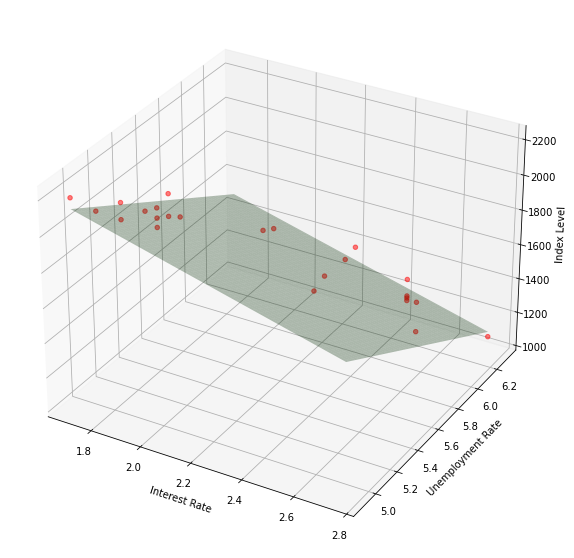

In [4]:
#Visualization
x_surf, y_surf = np.meshgrid(np.linspace(X.Interest_Rate.min(), X.Interest_Rate.max(), 100),np.linspace(X.Unemployment_Rate.min(), X.Unemployment_Rate.max(), 100))
Xvalues = pd.DataFrame({'Interest_Rate': x_surf.ravel(), 'Unemployment_Rate': y_surf.ravel()})

fittedY=Regressor.predict(Xvalues)
fittedY=np.array(fittedY)

fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Interest_Rate'],X['Unemployment_Rate'],Y['Index_Price'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='g', alpha=0.3)
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Unemployment Rate')
ax.set_zlabel('Index Level')
plt.show()

